In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import jax.numpy as jnp
import os

In [26]:
# Iterate over all files in the directory
traces = {}              
for path, dir, files in os.walk('/media/avena/Sandisk SDD/outputs_laboursim_numpyro/'):
    for file in files:
        if file.endswith(".nc"):
            print(path.split("/")[-1], file)
            trace = az.from_netcdf(f'{path}/{file}')
            traces[f"{path.split('/')[-1]}"] = trace     

MP10_MP9_no_sex trace.nc
MP11_MP10_no_exp trace.nc
MP1_all_vars_pooled trace.nc
MP2_MP1_no_grad_refyear trace.nc
MP3_MP2_no_self_emp trace.nc
MP4_MP3_no_public_sector trace.nc
MP5_MP4_no_part_time trace.nc
MP6_MP5_no_union trace.nc
MP7_MP6_no_tenure trace.nc
MP8_MP7_no_age trace.nc
MP9_MP8_no_edu trace.nc


In [31]:
az.loo(traces["MP1_all_vars_pooled"])

Computed from 4000 posterior samples and 81388 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -949768.89   312.48
p_loo       24.55        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     81388  100.0%
 (0.5, 0.7]   (ok)           0    0.0%
   (0.7, 1]   (bad)          0    0.0%
   (1, Inf)   (very bad)     0    0.0%

In [32]:
az.compare(traces)

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'log' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
MP1_all_vars_pooled,0,-949768.885883,24.553087,0.000000,1.000000,312.482099,0.000000,False,log
MP2_MP1_no_grad_refyear,1,-950356.383366,20.222249,587.497483,0.004443,310.894709,40.361719,False,log
MP3_MP2_no_self_emp,2,-950439.465341,18.387867,670.579458,0.004412,311.164470,43.035949,False,log
MP4_MP3_no_public_sector,3,-950550.057406,17.422683,781.171523,0.004370,308.509411,45.042381,False,log
MP5_MP4_no_part_time,4,-954387.849113,14.871651,4618.963230,0.002998,289.030039,109.505487,False,log
MP6_MP5_no_union,5,-954746.190044,13.757833,4977.304162,0.002894,282.638495,113.349970,False,log
MP7_MP6_no_tenure,6,-956482.502799,12.036918,6713.616916,0.002430,268.736356,128.615270,False,log
MP8_MP7_no_age,7,-956501.397493,11.004398,6732.511610,0.002427,268.891041,128.683818,False,log
MP9_MP8_no_edu,8,-962918.886365,4.909003,13150.000482,0.001165,271.235484,163.854701,False,log
MP10_MP9_no_sex,9,-965482.442836,3.775093,15713.556953,0.000773,275.444302,175.796797,False,log


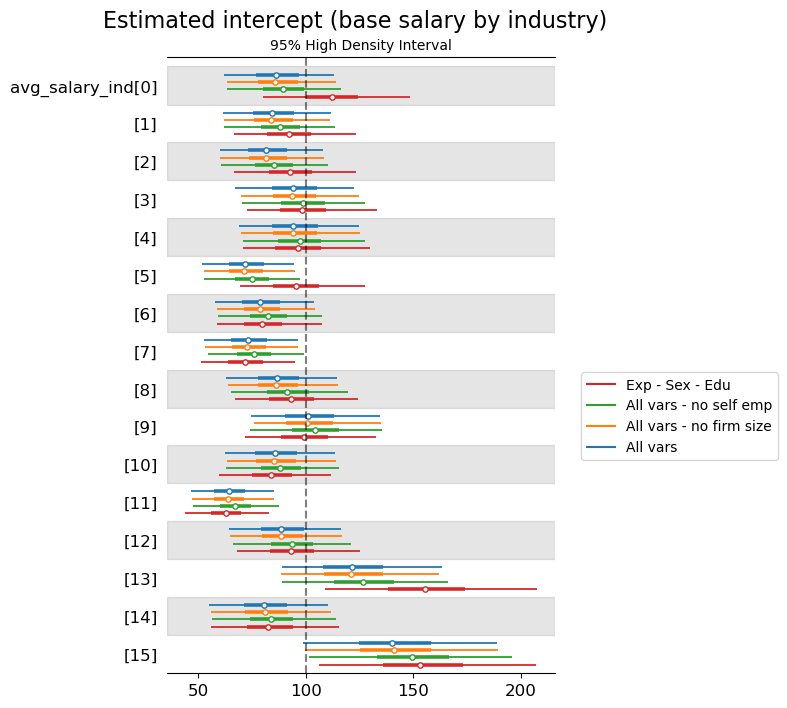

In [209]:
models = [traces['M10-M9+age'], traces['M9-M8+firm_size'], traces['M8-M7+self_emp'], traces['M2-M1+edu_level']]
axes = az.plot_forest(models, combined=True, legend=True, #combine_dims={"avg_salary_ind_dim_0","avg_salary_occ_dim_0"},
                      model_names=["All vars","All vars - no firm size","All vars - no self emp","Exp - Sex - Edu"],
                            figsize=(5, 8), var_names=["avg_salary_ind"], filter_vars="like", textsize=12)

legend = axes[0].get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))

# Add a title
plt.suptitle('Estimated intercept (base salary by industry)', fontsize=16, x=0.5, y=0.94);
axes[0].set_title('95% High Density Interval', fontsize=10);

# Add a vertical line at 0
axes[0].axvline(100, color='k', linestyle='--', alpha=0.5);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


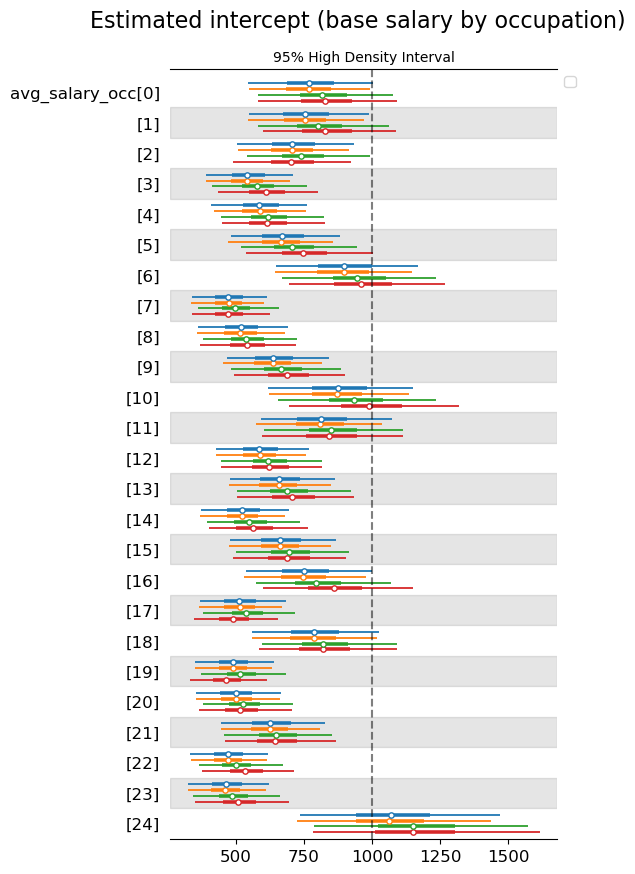

In [210]:
models = [traces['M10-M9+age'], traces['M9-M8+firm_size'], traces['M8-M7+self_emp'], traces['M2-M1+edu_level']]
axes = az.plot_forest(models, combined=True,legend=True, #combine_dims={"avg_salary_ind_dim_0","avg_salary_occ_dim_0"},
                      model_names=["All vars","All vars - no firm size","All vars - no self emp","Exp - Sex - Edu"],
                            figsize=(5, 10), var_names=["avg_salary_occ"], filter_vars="like", textsize=12)

# Locate legend outside the plot
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1));

# Add a title
plt.suptitle('Estimated intercept (base salary by occupation)', fontsize=16, x=0.5, y=0.94);
axes[0].set_title('95% High Density Interval', fontsize=10);

# Add a vertical line at 0
axes[0].axvline(1000, color='k', linestyle='--', alpha=0.5);

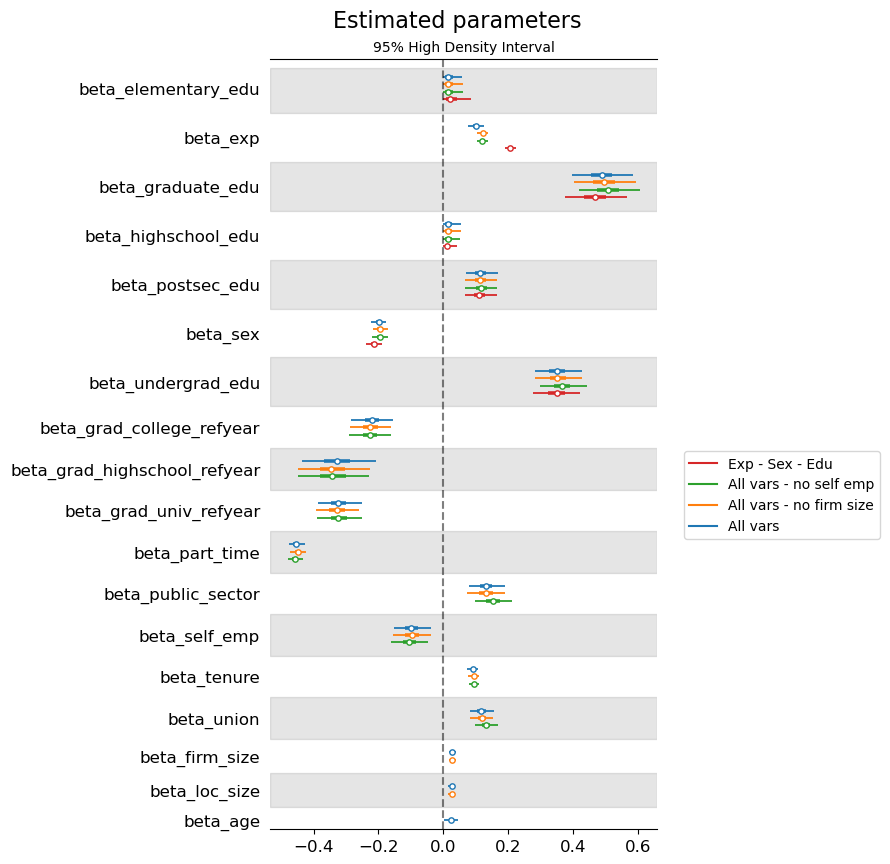

In [185]:
axes = az.plot_forest(models, combined=True, combine_dims={"avg_salary_ind_dim_0","avg_salary_occ_dim_0"},
                    model_names=["All vars","All vars - no firm size","All vars - no self emp","Exp - Sex - Edu"],
                            figsize=(5, 10), var_names=["~avg_salary_ind","~avg_salary_occ","~shape"], filter_vars="like", textsize=12)

legend = axes[0].get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))

# Add a title
plt.suptitle('Estimated parameters', fontsize=16, x=0.5, y=0.93);
axes[0].set_title('95% High Density Interval', fontsize=10);

# Add a vertical line at 0
axes[0].axvline(0, color='k', linestyle='--', alpha=0.5);

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import jax.numpy as jnp
import os

In [4]:
trace = az.from_netcdf('../outputs/MP11_MP10_no_exp/trace.nc')
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

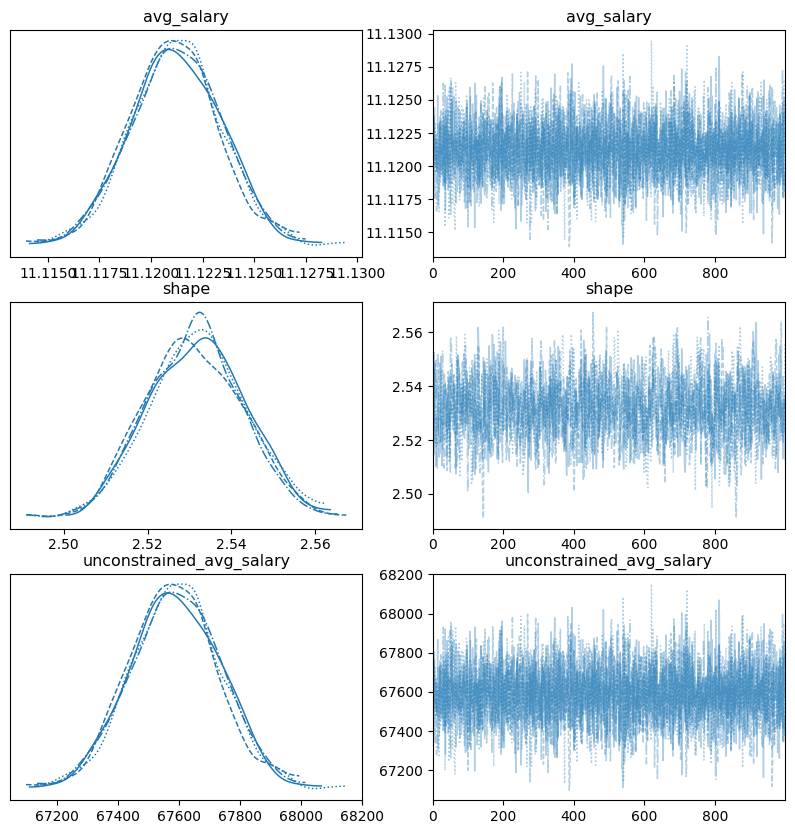

In [6]:
az.plot_trace(trace, figsize=(10, 10));

In [3]:
post = trace.posterior.copy()
post

<xarray.Dataset>
Dimensions:                                     (chain: 4, draw: 10)
Coordinates:
  * chain                                       (chain) int64 0 1 2 3
  * draw                                        (draw) int64 0 1 2 3 4 5 6 7 8 9
Data variables: (12/35)
    avg_salary                                  (chain, draw) float32 ...
    beta_age                                    (chain, draw) float32 ...
    beta_elementary_edu                         (chain, draw) float32 ...
    beta_exp                                    (chain, draw) float32 ...
    beta_grad_college_refyear                   (chain, draw) float32 ...
    beta_grad_highschool_refyear                (chain, draw) float32 ...
    ...                                          ...
    unconstrained_beta_public_sector            (chain, draw) float32 ...
    unconstrained_beta_self_emp                 (chain, draw) float32 ...
    unconstrained_beta_sex                      (chain, draw) float32 ...
    unconstrained_beta_tenure                   (chain, draw) float32 ...
    unconstrained_beta_undergrad_edu            (chain, draw) float32 ...
    unconstrained_beta_union                    (chain, draw) float32 ...
Attributes:
    created_at:                 2023-09-28T14:45:47.464349
    arviz_version:              0.16.1
    inference_library:          numpyro
    inference_library_version:  0.13.2

In [4]:
trace.add_groups(test=post)

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/data/inference_data.py:1509: UserWarning: The group test is not defined in the InferenceData scheme
  warnings.warn(


In [5]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> test

In [10]:
trace["posterior"]

<xarray.Dataset>
Dimensions:                                     (chain: 4, draw: 10)
Coordinates:
  * chain                                       (chain) int64 0 1 2 3
  * draw                                        (draw) int64 0 1 2 3 4 5 6 7 8 9
Data variables: (12/35)
    avg_salary                                  (chain, draw) float32 ...
    beta_age                                    (chain, draw) float32 ...
    beta_elementary_edu                         (chain, draw) float32 ...
    beta_exp                                    (chain, draw) float32 ...
    beta_grad_college_refyear                   (chain, draw) float32 ...
    beta_grad_highschool_refyear                (chain, draw) float32 ...
    ...                                          ...
    unconstrained_beta_public_sector            (chain, draw) float32 ...
    unconstrained_beta_self_emp                 (chain, draw) float32 ...
    unconstrained_beta_sex                      (chain, draw) float32 ...
    unconstrained_beta_tenure                   (chain, draw) float32 ...
    unconstrained_beta_undergrad_edu            (chain, draw) float32 ...
    unconstrained_beta_union                    (chain, draw) float32 ...
Attributes:
    created_at:                 2023-09-28T14:45:47.464349
    arviz_version:              0.16.1
    inference_library:          numpyro
    inference_library_version:  0.13.2

In [7]:
trace.sel(groups=["~test"], filter_groups="like")

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> test

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (35), generating only 20 plots
  warnings.warn(


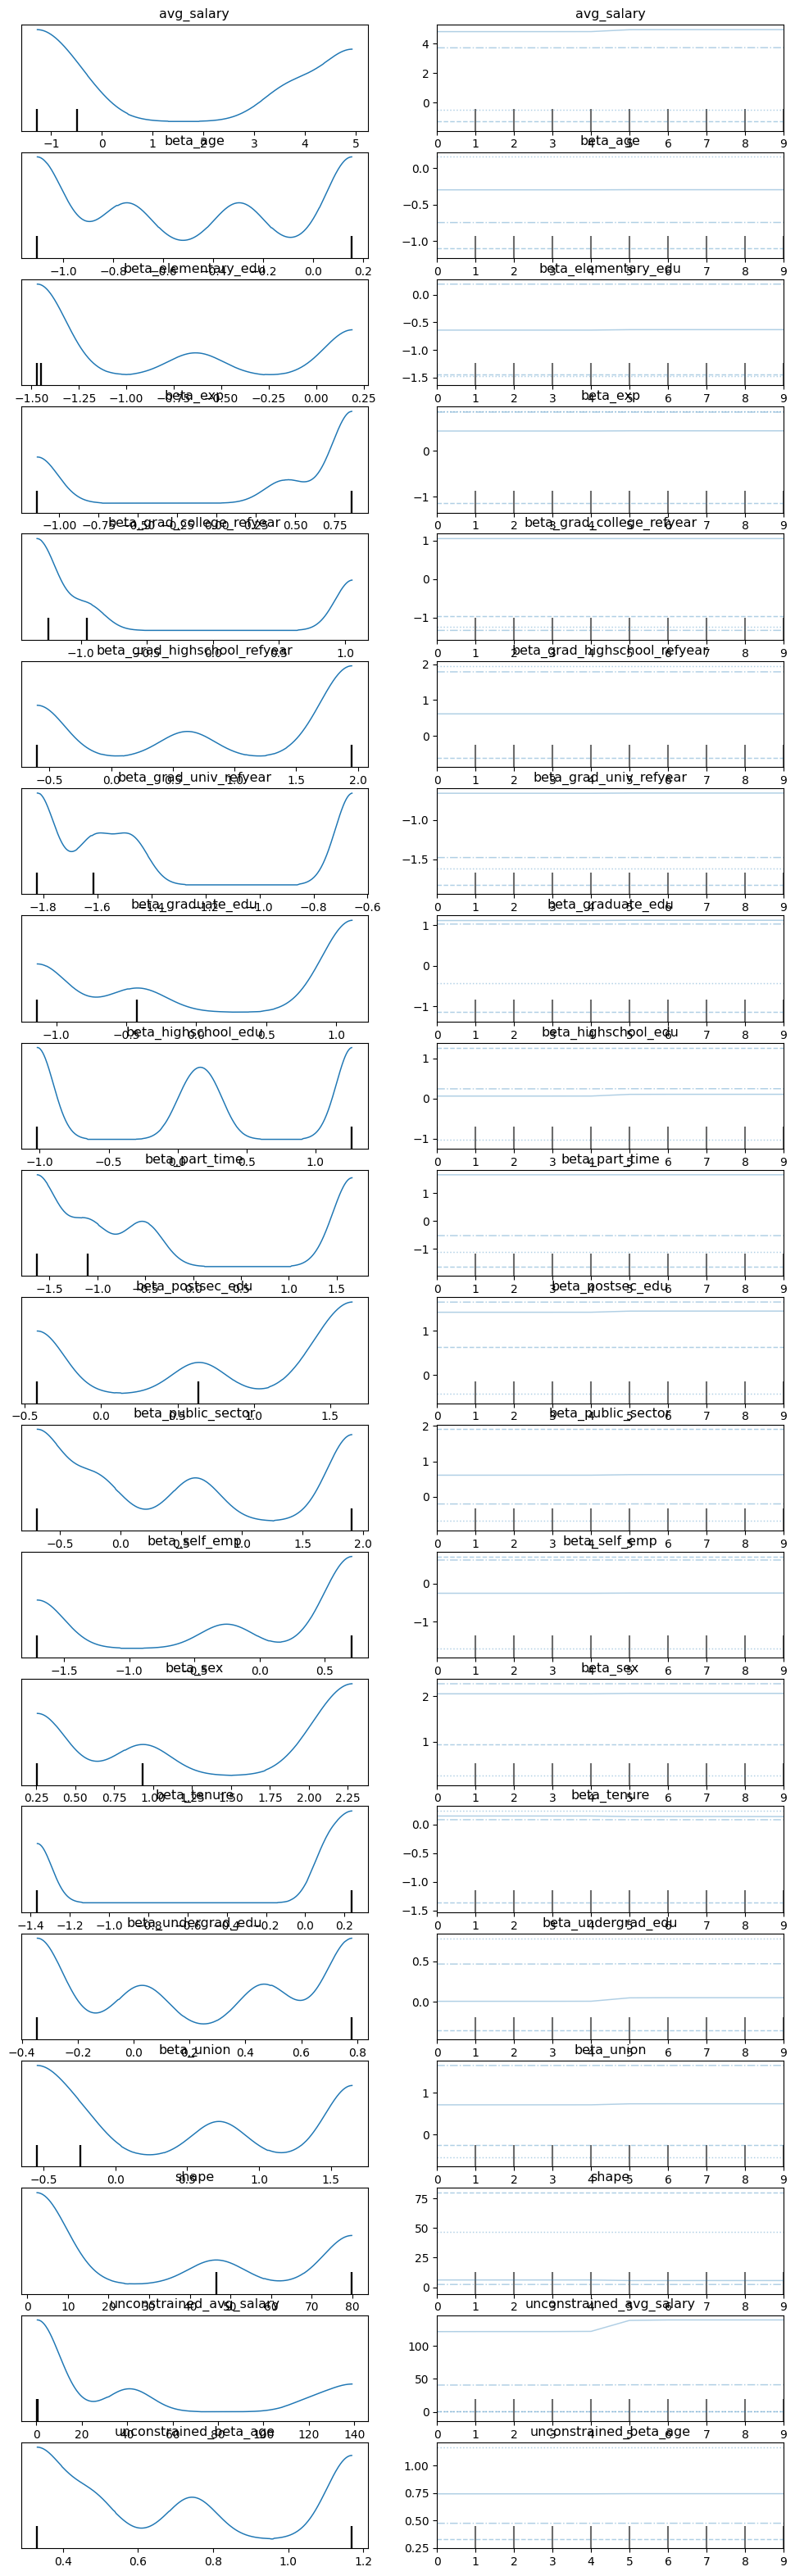

In [6]:
az.plot_trace(trace, combined=True);

In [15]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [18]:
az.waic(trace)

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 8000 posterior samples and 4515 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -53348.45    60.13
p_waic       29.05        -

There has been a warning during the calculation. Please check the results.

In [9]:
az.loo(trace, pointwise=True)

Computed from 4000 posterior samples and 4515 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -52827.12    61.99
p_loo       56.32        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     4515  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%